In [1]:
from ucimlrepo import fetch_ucirepo
from implementations import bayes
from implementations import id3
from implementations import random_forest
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from typing import Tuple
import pandas as pd
import time
import importlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

In [18]:
X = np.loadtxt("../data_processed/healthcare/percentile_n_hotone/X.csv", dtype=float, delimiter=",")
y = np.loadtxt("../data_processed/healthcare/percentile_n_hotone/y.csv", dtype=float, delimiter=",")


[1.49341240e-09 1.46549752e-09 1.41771731e-09] 2.0
[1.71930107e-09 1.67677399e-09 1.80343020e-09] 0.0
[1.21229749e-09 1.20194371e-09 1.36466396e-09] 1.0
[1.74859092e-09 1.60639286e-09 1.71418309e-09] 2.0
[1.74069544e-09 1.77034361e-09 1.68671143e-09] 0.0
[1.49420313e-09 1.45557535e-09 1.51949090e-09] 2.0
[1.99718611e-09 1.76139008e-09 1.81702133e-09] 0.0
[1.26898614e-09 1.28175803e-09 1.39001724e-09] 2.0
[1.86718417e-09 1.74308743e-09 1.78588095e-09] 1.0
[1.39266909e-09 1.26442042e-09 1.51602269e-09] 1.0
[5.48638927e-10 5.77593192e-10 5.05701865e-10] 0.0
[1.42993540e-09 1.41601856e-09 1.56711912e-09] 1.0
[1.48199317e-09 1.25624062e-09 1.55192981e-09] 1.0
[6.69694245e-10 6.88323251e-10 6.96558243e-10] 2.0
[1.23964363e-09 1.20082551e-09 1.38301788e-09] 2.0
[1.36112384e-09 1.35365071e-09 1.53224912e-09] 1.0
[1.80021306e-09 1.77205950e-09 1.79792161e-09] 2.0
[1.93335000e-09 1.88594036e-09 1.70683331e-09] 2.0
[7.18379178e-10 7.56241025e-10 7.15269326e-10] 2.0
[1.23904933e-09 1.21475005e-09 

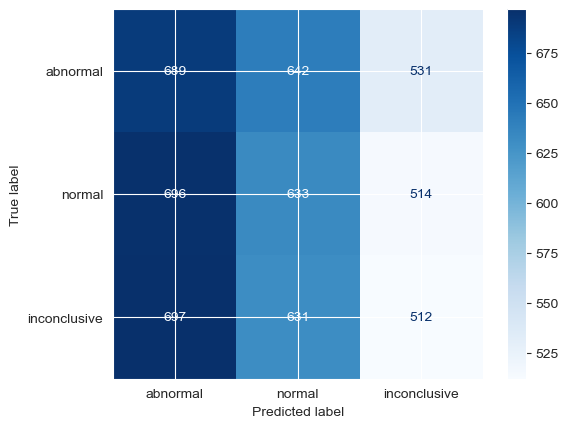

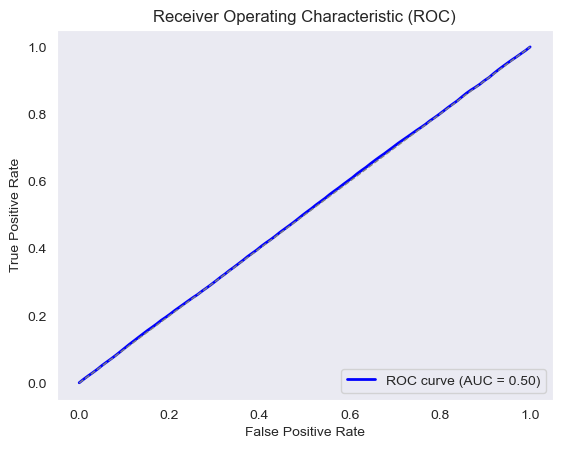

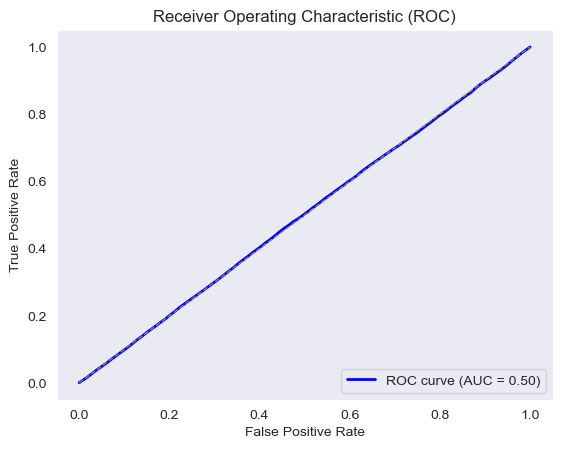

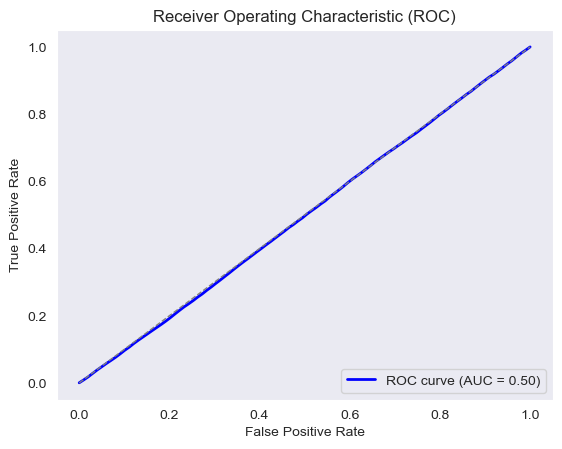

In [4]:
#################### BAYES
importlib.reload(random_forest)
accuracies = []
time1 = time.time()

fpr_list0 = []
tpr_list0 = []
auc_list0 = []
fpr_list1 = []
tpr_list1 = []
auc_list1 = []
fpr_list2 = []
tpr_list2 = []
auc_list2 = []
y_testing = []
y_pred = []
for licznik in range(25):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random.randrange(200))
    bay = bayes.NaiveBayes()
    bay.fit(x_train, y_train)

    samples = len(y_test)
    correctly_predicted = 0
    scores0 = [] #####################
    scores1 = [] #####################
    scores2 = [] #####################
    for sample, gt in zip(x_test, y_test):
        prediction = bay.predict(sample)
        scores0.append(prediction[0]) #############333
        scores1.append(prediction[1])
        scores2.append(prediction[2])
        y_pred.append(np.argmax(prediction))
        y_testing.append(gt)
        print(prediction, gt)
        if np.argmax(prediction) == gt:
            correctly_predicted += 1
    y_test0 = []
    y_test1 = []
    y_test2 = []
    for yyy in y_test:
        if yyy == 0:
            y_test0.append(1)
            y_test1.append(0)
            y_test2.append(0)
        if yyy == 1:
            y_test0.append(0)
            y_test1.append(1)
            y_test2.append(0)
        if yyy == 2:
            y_test0.append(0)
            y_test1.append(0)
            y_test2.append(1)

    fpr0, tpr0, _ = roc_curve(y_test0, scores0)
    roc_auc0 = auc(fpr0, tpr0)
    fpr_list0.append(fpr0)
    tpr_list0.append(tpr0)
    auc_list0.append(roc_auc0)

    fpr1, tpr1, _ = roc_curve(y_test1, scores1)
    roc_auc1 = auc(fpr1, tpr1)
    fpr_list1.append(fpr1)
    tpr_list1.append(tpr1)
    auc_list1.append(roc_auc1)

    fpr2, tpr2, _ = roc_curve(y_test2, scores2)
    roc_auc2 = auc(fpr2, tpr2)
    fpr_list2.append(fpr2)
    tpr_list2.append(tpr2)
    auc_list2.append(roc_auc2)

    print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")
    print(f"Elapsed time: {time.time()-time1:.2f} s")
    accuracies.append((correctly_predicted / samples) * 100)
    print(f"Próbka numer {licznik+1}")
print(f"Mean accuracy: {np.mean(accuracies):.2f}%")

cm = confusion_matrix(y_testing, y_pred, labels=[0, 1, 2])
cm = cm//25
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["abnormal", "normal", "inconclusive"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


# Define a common set of FPR values
mean_fpr0 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp0 = [np.interp(mean_fpr0, fpr0, tpr0) for fpr0, tpr0 in zip(fpr_list0, tpr_list0)]
# Average the interpolated TPR values
mean_tpr0 = np.mean(tpr_interp0, axis=0)
# Compute the mean AUC
mean_auc0 = np.mean(auc_list0)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr0, mean_tpr0, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc0:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Define a common set of FPR values
mean_fpr1 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp1 = [np.interp(mean_fpr1, fpr1, tpr1) for fpr1, tpr1 in zip(fpr_list1, tpr_list1)]
# Average the interpolated TPR values
mean_tpr1 = np.mean(tpr_interp1, axis=0)
# Compute the mean AUC
mean_auc1 = np.mean(auc_list1)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr1, mean_tpr1, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()




# Define a common set of FPR values
mean_fpr2 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp2 = [np.interp(mean_fpr2, fpr2, tpr2) for fpr2, tpr2 in zip(fpr_list2, tpr_list2)]
# Average the interpolated TPR values
mean_tpr2 = np.mean(tpr_interp2, axis=0)
# Compute the mean AUC
mean_auc2 = np.mean(auc_list2)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr2, mean_tpr2, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

[0. 0. 1.] 2.0
[0. 0. 1.] 0.0
[0. 1. 0.] 1.0
[0. 1. 0.] 0.0
[0. 1. 0.] 1.0
[0. 0. 1.] 0.0
[1. 0. 0.] 0.0
[0. 0. 1.] 0.0
[0. 1. 0.] 0.0
[1. 0. 0.] 1.0
[0. 1. 0.] 2.0
[1. 0. 0.] 1.0
[0. 0. 1.] 2.0
[0. 0. 1.] 2.0
[0. 0. 1.] 0.0
[0. 1. 0.] 2.0
[0. 1. 0.] 1.0
[0. 1. 0.] 2.0
[0. 1. 0.] 0.0
[0. 1. 0.] 2.0
[0. 1. 0.] 0.0
[0. 1. 0.] 2.0
[0. 1. 0.] 2.0
[1. 0. 0.] 1.0
[1. 0. 0.] 1.0
[0. 0. 1.] 1.0
[1. 0. 0.] 0.0
[0. 0. 1.] 1.0
[1. 0. 0.] 1.0
[0. 0. 1.] 0.0
[0. 1. 0.] 0.0
[0. 1. 0.] 1.0
[1. 0. 0.] 1.0
[0. 1. 0.] 0.0
[0. 1. 0.] 2.0
[0. 1. 0.] 2.0
[1. 0. 0.] 0.0
[0. 0. 1.] 0.0
[0. 0. 1.] 0.0
[0. 0. 1.] 1.0
[0. 1. 0.] 0.0
[1. 0. 0.] 0.0
[0. 1. 0.] 0.0
[0. 0. 1.] 1.0
[0. 0. 1.] 2.0
[0. 0. 1.] 0.0
[0. 0. 1.] 1.0
[1. 0. 0.] 0.0
[1. 0. 0.] 2.0
[0. 1. 0.] 1.0
[0. 1. 0.] 0.0
[1. 0. 0.] 1.0
[0. 1. 0.] 1.0
[1. 0. 0.] 0.0
[0. 0. 1.] 1.0
[0. 1. 0.] 1.0
[0. 1. 0.] 1.0
[1. 0. 0.] 2.0
[0. 1. 0.] 1.0
[0. 1. 0.] 0.0
[0. 0. 1.] 0.0
[0. 1. 0.] 0.0
[0. 1. 0.] 1.0
[0. 1. 0.] 2.0
[1. 0. 0.] 2.0
[1. 0. 0.] 2.0
[1. 0. 0.]

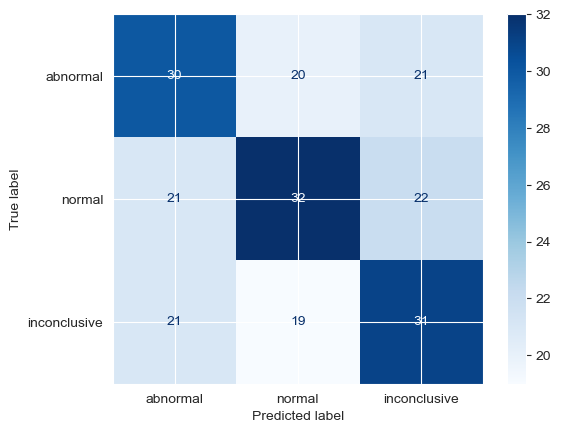

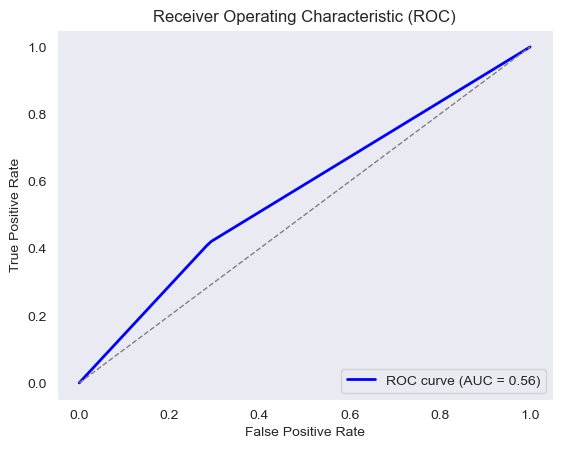

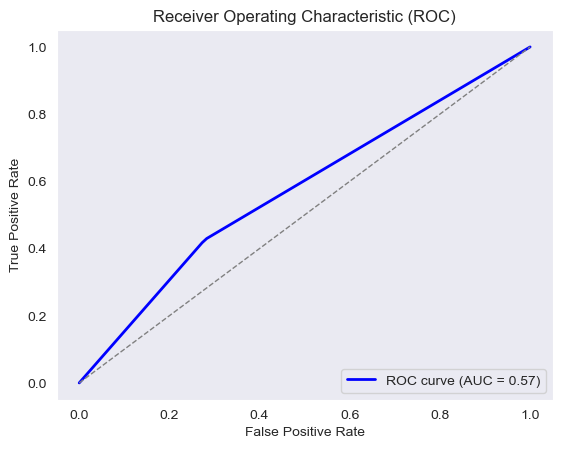

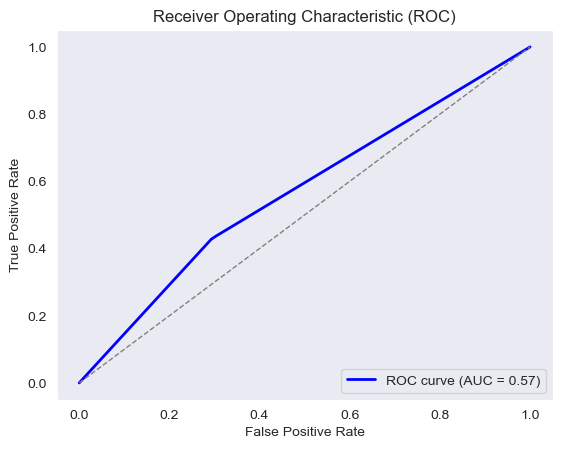

In [25]:
#################### ID3
importlib.reload(random_forest)
accuracies = []
time1 = time.time()

fpr_list0 = []
tpr_list0 = []
auc_list0 = []
fpr_list1 = []
tpr_list1 = []
auc_list1 = []
fpr_list2 = []
tpr_list2 = []
auc_list2 = []
y_testing = []
y_pred = []
for licznik in range(25):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random.randrange(200))
    tree = id3.DecisionTreeClassifier(1e10)
    tree.fit(x_train, y_train)

    samples = len(y_test)
    correctly_predicted = 0
    scores0 = [] #####################
    scores1 = [] #####################
    scores2 = [] #####################
    for sample, gt in zip(x_test, y_test):
        prediction = tree.predict(sample)
        scores0.append(prediction[0]) #############333
        scores1.append(prediction[1])
        scores2.append(prediction[2])
        y_pred.append(np.argmax(prediction))
        y_testing.append(gt)
        print(prediction, gt)
        if np.argmax(prediction) == gt:
            correctly_predicted += 1
    y_test0 = []
    y_test1 = []
    y_test2 = []
    for yyy in y_test:
        if yyy == 0:
            y_test0.append(1)
            y_test1.append(0)
            y_test2.append(0)
        if yyy == 1:
            y_test0.append(0)
            y_test1.append(1)
            y_test2.append(0)
        if yyy == 2:
            y_test0.append(0)
            y_test1.append(0)
            y_test2.append(1)

    fpr0, tpr0, _ = roc_curve(y_test0, scores0)
    roc_auc0 = auc(fpr0, tpr0)
    fpr_list0.append(fpr0)
    tpr_list0.append(tpr0)
    auc_list0.append(roc_auc0)

    fpr1, tpr1, _ = roc_curve(y_test1, scores1)
    roc_auc1 = auc(fpr1, tpr1)
    fpr_list1.append(fpr1)
    tpr_list1.append(tpr1)
    auc_list1.append(roc_auc1)

    fpr2, tpr2, _ = roc_curve(y_test2, scores2)
    roc_auc2 = auc(fpr2, tpr2)
    fpr_list2.append(fpr2)
    tpr_list2.append(tpr2)
    auc_list2.append(roc_auc2)

    print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")
    print(f"Elapsed time: {time.time()-time1:.2f} s")
    accuracies.append((correctly_predicted / samples) * 100)
    print(f"Próbka numer {licznik+1}")
print(f"Mean accuracy: {np.mean(accuracies):.2f}%")

cm = confusion_matrix(y_testing, y_pred, labels=[0, 1, 2])
cm = cm//25
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["abnormal", "normal", "inconclusive"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


# Define a common set of FPR values
mean_fpr0 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp0 = [np.interp(mean_fpr0, fpr0, tpr0) for fpr0, tpr0 in zip(fpr_list0, tpr_list0)]
# Average the interpolated TPR values
mean_tpr0 = np.mean(tpr_interp0, axis=0)
# Compute the mean AUC
mean_auc0 = np.mean(auc_list0)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr0, mean_tpr0, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc0:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Define a common set of FPR values
mean_fpr1 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp1 = [np.interp(mean_fpr1, fpr1, tpr1) for fpr1, tpr1 in zip(fpr_list1, tpr_list1)]
# Average the interpolated TPR values
mean_tpr1 = np.mean(tpr_interp1, axis=0)
# Compute the mean AUC
mean_auc1 = np.mean(auc_list1)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr1, mean_tpr1, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()




# Define a common set of FPR values
mean_fpr2 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp2 = [np.interp(mean_fpr2, fpr2, tpr2) for fpr2, tpr2 in zip(fpr_list2, tpr_list2)]
# Average the interpolated TPR values
mean_tpr2 = np.mean(tpr_interp2, axis=0)
# Compute the mean AUC
mean_auc2 = np.mean(auc_list2)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr2, mean_tpr2, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
#################### RANDOM FOREST ID3 100%
importlib.reload(random_forest)
accuracies = []
time1 = time.time()

fpr_list0 = []
tpr_list0 = []
auc_list0 = []
fpr_list1 = []
tpr_list1 = []
auc_list1 = []
fpr_list2 = []
tpr_list2 = []
auc_list2 = []
y_testing = []
y_pred = []
for licznik in range(25):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random.randrange(200))
    rfc = random_forest.RandomForestClassifier(classifiers_number=50)
    rfc.fit(x_train, y_train, tree_percentage=1.0)

    samples = len(y_test)
    correctly_predicted = 0
    scores0 = [] #####################
    scores1 = [] #####################
    scores2 = [] #####################
    for sample, gt in zip(x_test, y_test):
        prediction = rfc.predict(sample)
        scores0.append(prediction[0]) #############333
        scores1.append(prediction[1])
        scores2.append(prediction[2])
        y_pred.append(np.argmax(prediction))
        y_testing.append(gt)
        print(prediction, gt)
        if np.argmax(prediction) == gt:
            correctly_predicted += 1
    y_test0 = []
    y_test1 = []
    y_test2 = []
    for yyy in y_test:
        if yyy == 0:
            y_test0.append(1)
            y_test1.append(0)
            y_test2.append(0)
        if yyy == 1:
            y_test0.append(0)
            y_test1.append(1)
            y_test2.append(0)
        if yyy == 2:
            y_test0.append(0)
            y_test1.append(0)
            y_test2.append(1)

    fpr0, tpr0, _ = roc_curve(y_test0, scores0)
    roc_auc0 = auc(fpr0, tpr0)
    fpr_list0.append(fpr0)
    tpr_list0.append(tpr0)
    auc_list0.append(roc_auc0)

    fpr1, tpr1, _ = roc_curve(y_test1, scores1)
    roc_auc1 = auc(fpr1, tpr1)
    fpr_list1.append(fpr1)
    tpr_list1.append(tpr1)
    auc_list1.append(roc_auc1)

    fpr2, tpr2, _ = roc_curve(y_test2, scores2)
    roc_auc2 = auc(fpr2, tpr2)
    fpr_list2.append(fpr2)
    tpr_list2.append(tpr2)
    auc_list2.append(roc_auc2)

    print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")
    print(f"Elapsed time: {time.time()-time1:.2f} s")
    accuracies.append((correctly_predicted / samples) * 100)
    print(f"Próbka numer {licznik+1}")
print(f"Mean accuracy: {np.mean(accuracies):.2f}%")

cm = confusion_matrix(y_testing, y_pred, labels=[0, 1, 2])
cm = cm//25
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["abnormal", "normal", "inconclusive"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


# Define a common set of FPR values
mean_fpr0 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp0 = [np.interp(mean_fpr0, fpr0, tpr0) for fpr0, tpr0 in zip(fpr_list0, tpr_list0)]
# Average the interpolated TPR values
mean_tpr0 = np.mean(tpr_interp0, axis=0)
# Compute the mean AUC
mean_auc0 = np.mean(auc_list0)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr0, mean_tpr0, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc0:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Define a common set of FPR values
mean_fpr1 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp1 = [np.interp(mean_fpr1, fpr1, tpr1) for fpr1, tpr1 in zip(fpr_list1, tpr_list1)]
# Average the interpolated TPR values
mean_tpr1 = np.mean(tpr_interp1, axis=0)
# Compute the mean AUC
mean_auc1 = np.mean(auc_list1)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr1, mean_tpr1, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()




# Define a common set of FPR values
mean_fpr2 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp2 = [np.interp(mean_fpr2, fpr2, tpr2) for fpr2, tpr2 in zip(fpr_list2, tpr_list2)]
# Average the interpolated TPR values
mean_tpr2 = np.mean(tpr_interp2, axis=0)
# Compute the mean AUC
mean_auc2 = np.mean(auc_list2)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr2, mean_tpr2, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
#################### RANDOM FOREST ID3/BAYES 50/50
importlib.reload(random_forest)
accuracies = []
time1 = time.time()

fpr_list0 = []
tpr_list0 = []
auc_list0 = []
fpr_list1 = []
tpr_list1 = []
auc_list1 = []
fpr_list2 = []
tpr_list2 = []
auc_list2 = []
y_testing = []
y_pred = []
for licznik in range(25):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random.randrange(200))
    rfc = random_forest.RandomForestClassifier(classifiers_number=50)
    rfc.fit(x_train, y_train, tree_percentage=0.5)

    samples = len(y_test)
    correctly_predicted = 0
    scores0 = [] #####################
    scores1 = [] #####################
    scores2 = [] #####################
    for sample, gt in zip(x_test, y_test):
        prediction = rfc.predict(sample)
        scores0.append(prediction[0]) #############333
        scores1.append(prediction[1])
        scores2.append(prediction[2])
        y_pred.append(np.argmax(prediction))
        y_testing.append(gt)
        print(prediction, gt)
        if np.argmax(prediction) == gt:
            correctly_predicted += 1
    y_test0 = []
    y_test1 = []
    y_test2 = []
    for yyy in y_test:
        if yyy == 0:
            y_test0.append(1)
            y_test1.append(0)
            y_test2.append(0)
        if yyy == 1:
            y_test0.append(0)
            y_test1.append(1)
            y_test2.append(0)
        if yyy == 2:
            y_test0.append(0)
            y_test1.append(0)
            y_test2.append(1)

    fpr0, tpr0, _ = roc_curve(y_test0, scores0)
    roc_auc0 = auc(fpr0, tpr0)
    fpr_list0.append(fpr0)
    tpr_list0.append(tpr0)
    auc_list0.append(roc_auc0)

    fpr1, tpr1, _ = roc_curve(y_test1, scores1)
    roc_auc1 = auc(fpr1, tpr1)
    fpr_list1.append(fpr1)
    tpr_list1.append(tpr1)
    auc_list1.append(roc_auc1)

    fpr2, tpr2, _ = roc_curve(y_test2, scores2)
    roc_auc2 = auc(fpr2, tpr2)
    fpr_list2.append(fpr2)
    tpr_list2.append(tpr2)
    auc_list2.append(roc_auc2)

    print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")
    print(f"Elapsed time: {time.time()-time1:.2f} s")
    accuracies.append((correctly_predicted / samples) * 100)
    print(f"Próbka numer {licznik+1}")
print(f"Mean accuracy: {np.mean(accuracies):.2f}%")

cm = confusion_matrix(y_testing, y_pred, labels=[0, 1, 2])
cm = cm//25
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["abnormal", "normal", "inconclusive"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


# Define a common set of FPR values
mean_fpr0 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp0 = [np.interp(mean_fpr0, fpr0, tpr0) for fpr0, tpr0 in zip(fpr_list0, tpr_list0)]
# Average the interpolated TPR values
mean_tpr0 = np.mean(tpr_interp0, axis=0)
# Compute the mean AUC
mean_auc0 = np.mean(auc_list0)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr0, mean_tpr0, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc0:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Define a common set of FPR values
mean_fpr1 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp1 = [np.interp(mean_fpr1, fpr1, tpr1) for fpr1, tpr1 in zip(fpr_list1, tpr_list1)]
# Average the interpolated TPR values
mean_tpr1 = np.mean(tpr_interp1, axis=0)
# Compute the mean AUC
mean_auc1 = np.mean(auc_list1)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr1, mean_tpr1, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()




# Define a common set of FPR values
mean_fpr2 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp2 = [np.interp(mean_fpr2, fpr2, tpr2) for fpr2, tpr2 in zip(fpr_list2, tpr_list2)]
# Average the interpolated TPR values
mean_tpr2 = np.mean(tpr_interp2, axis=0)
# Compute the mean AUC
mean_auc2 = np.mean(auc_list2)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr2, mean_tpr2, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()